IMPORT LIBRARIES

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [296]:
gold_data = pd.read_csv('gld_price_data.csv')

EXPLORATORY DATA ANALYSIS

In [297]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [298]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [299]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [300]:
# basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [301]:
# getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Time Features

In [302]:
# Convert Date to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

gold_data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2290 entries, 0 to 2289
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2290 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.0 KB


Statistical Measure - Skewness

In [303]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [304]:
# only numeric columns
num_cols = gold_data.select_dtypes(include='number').columns

from scipy.stats import skew
print(gold_data[num_cols].skew())

SPX        0.300362
GLD        0.334138
USO        1.699331
SLV        1.153641
EUR/USD   -0.005292
dtype: float64


In [305]:
# -ve values means left skewed and +ve value the opposite
# SLV and USO has high skewness as its value outside range (-1,1)

Boxplots (check for outliers)

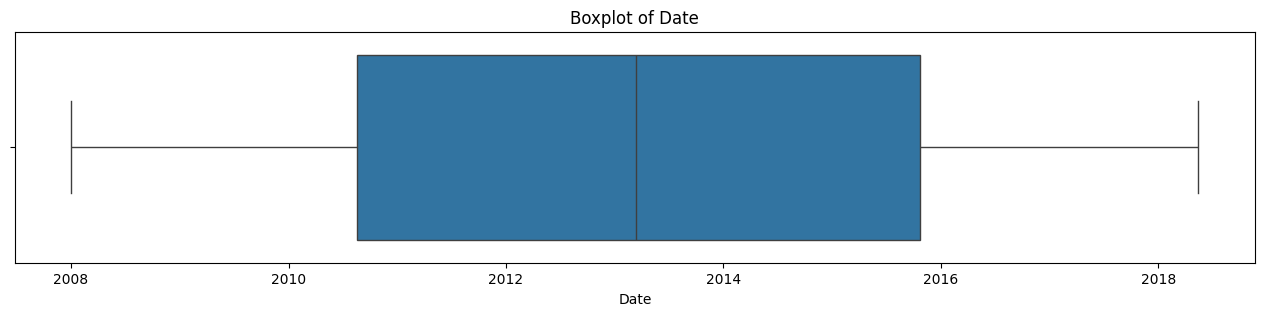

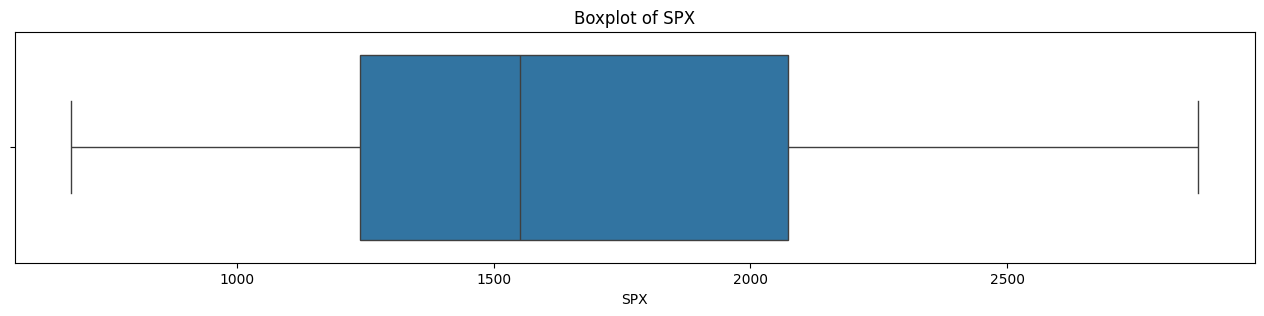

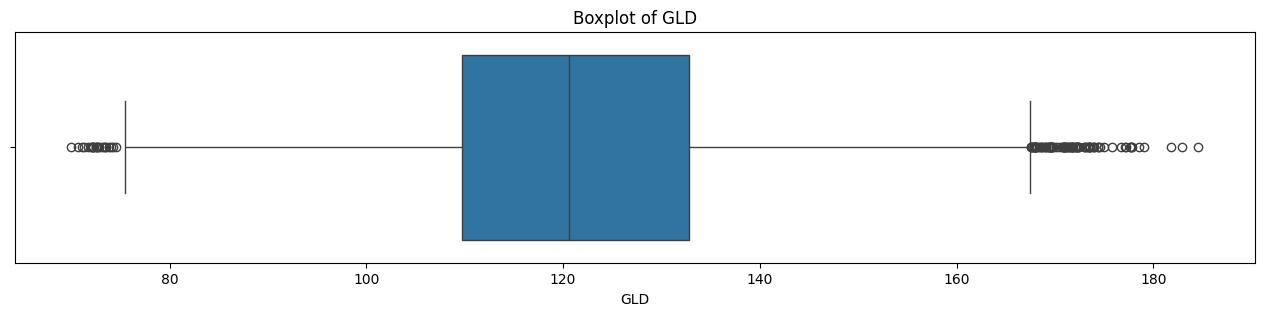

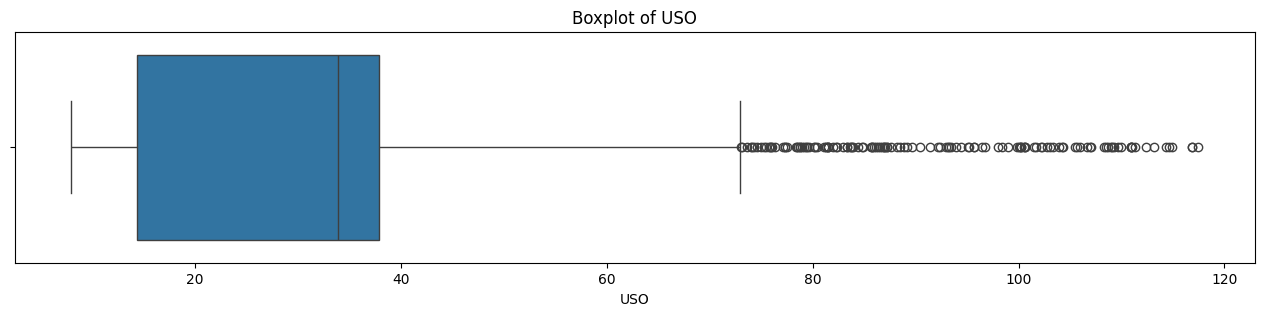

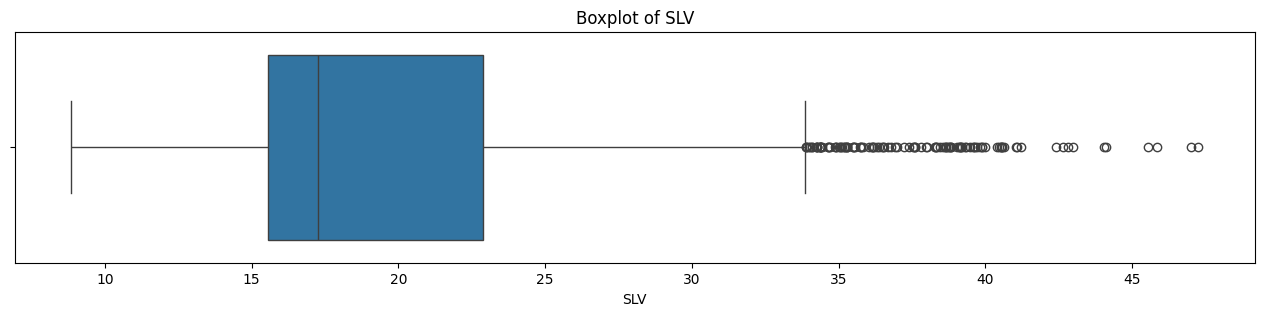

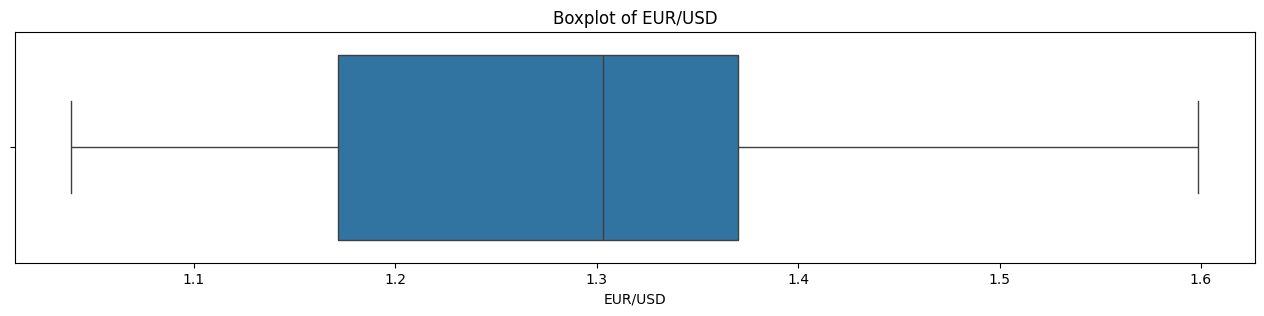

In [306]:
for col in gold_data:
    plt.figure(figsize=(16,3))
    sns.boxplot(x=gold_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Outlier Removal

In [307]:
detect = ['USO','SLV']
# These are features that has outliers

for col in detect:
    Q1 = gold_data[col].quantile(0.25)
    Q3 = gold_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    gold_data[col] = gold_data[col].clip(lower,upper)

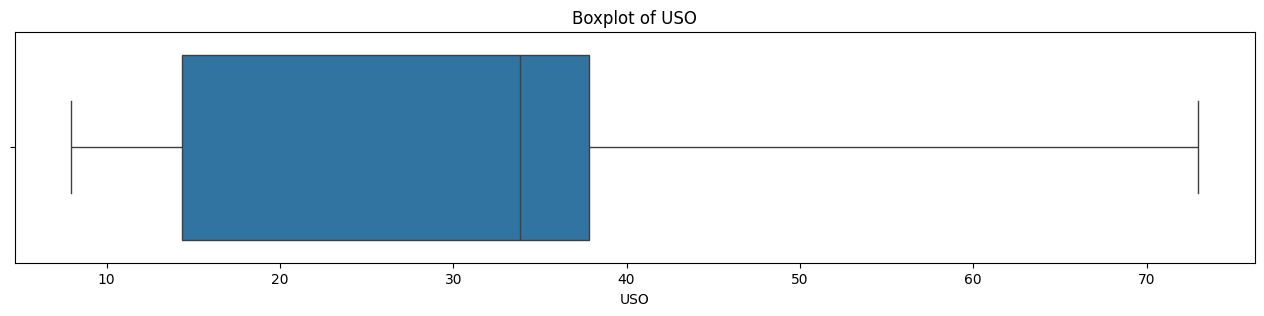

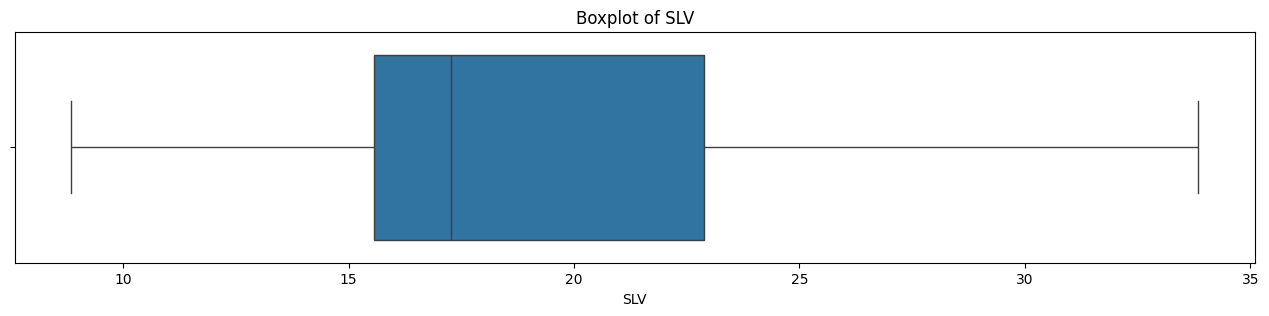

In [308]:
for col in detect:
    plt.figure(figsize=(16,3))
    sns.boxplot(x=gold_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [309]:
# Outliers Removed

DATA PREPROCESSING

In [310]:
# No missing values to handle , if had any we could use filling or dropping techniques
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [311]:
gold_data.duplicated().sum()

0

Feature Engineering

In [312]:
# Feature Selection
# Adding an Extra Feature

gold_data['GLD_lag1'] = gold_data['GLD'].shift(1)
gold_data['GLD_lag4'] = gold_data['GLD'].shift(4)
# Price before 1 day and 4 day

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,GLD_lag1,GLD_lag4
0,2008-01-02,1447.160034,84.860001,72.998754,15.180,1.471692,NaN,NaN
1,2008-01-03,1447.160034,85.570000,72.998754,15.285,1.474491,84.860001,NaN
2,2008-01-04,1411.630005,85.129997,72.998754,15.167,1.475492,85.570000,NaN
3,2008-01-07,1416.180054,84.769997,72.998754,15.053,1.468299,85.129997,NaN
4,2008-01-08,1390.189941,86.779999,72.998754,15.590,1.557099,84.769997,84.860001


In [313]:
# Dropping the null part
gold_data.dropna(inplace=True)
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,GLD_lag1,GLD_lag4
4,2008-01-08,1390.189941,86.779999,72.998754,15.590000,1.557099,84.769997,84.860001
5,2008-01-09,1409.130005,86.550003,72.998754,15.520000,1.466405,86.779999,85.570000
6,2008-01-10,1420.329956,88.250000,72.998754,16.061001,1.480100,86.550003,85.129997
7,2008-01-11,1401.020020,88.580002,72.998754,16.077000,1.479006,88.250000,84.769997
8,2008-01-14,1416.250000,89.540001,72.998754,16.280001,1.486900,88.580002,86.779999


Feature Scaling

In [314]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,GLD_lag1,GLD_lag4
4,2008-01-08,1390.189941,86.779999,72.998754,15.590000,1.557099,84.769997,84.860001
5,2008-01-09,1409.130005,86.550003,72.998754,15.520000,1.466405,86.779999,85.570000
6,2008-01-10,1420.329956,88.250000,72.998754,16.061001,1.480100,86.550003,85.129997
7,2008-01-11,1401.020020,88.580002,72.998754,16.077000,1.479006,88.250000,84.769997
8,2008-01-14,1416.250000,89.540001,72.998754,16.280001,1.486900,88.580002,86.779999


In [315]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
gold_data[['SPX','USO','SLV']] = scaler.fit_transform(gold_data[['SPX','USO','SLV']])

In [316]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,GLD_lag1,GLD_lag4
4,2008-01-08,-0.509307,86.779999,2.64373,-0.651651,1.557099,84.769997,84.860001
5,2008-01-09,-0.472840,86.550003,2.64373,-0.662239,1.466405,86.779999,85.570000
6,2008-01-10,-0.451275,88.250000,2.64373,-0.580407,1.480100,86.550003,85.129997
7,2008-01-11,-0.488455,88.580002,2.64373,-0.577987,1.479006,88.250000,84.769997
8,2008-01-14,-0.459131,89.540001,2.64373,-0.547281,1.486900,88.580002,86.779999


VISUALIZATION - TREND ANALYSIS

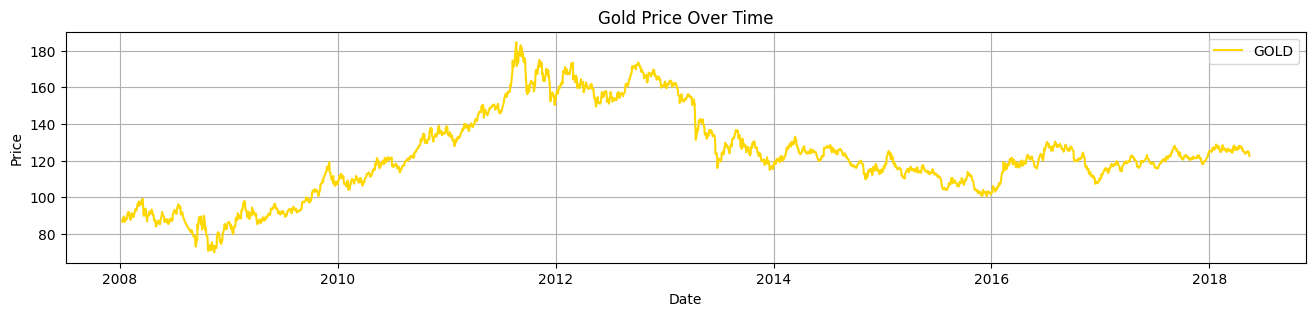

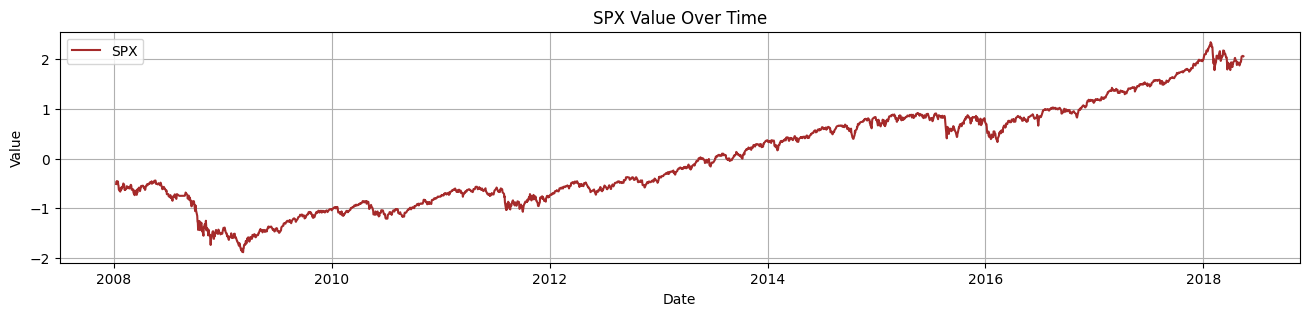

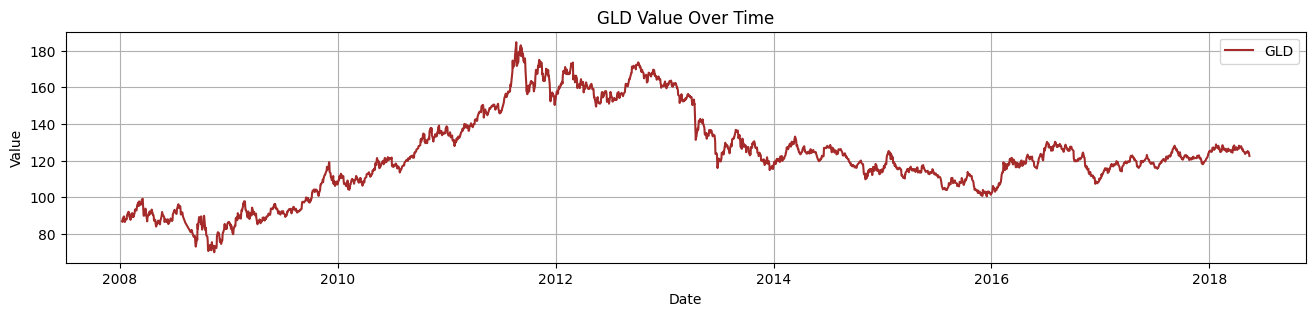

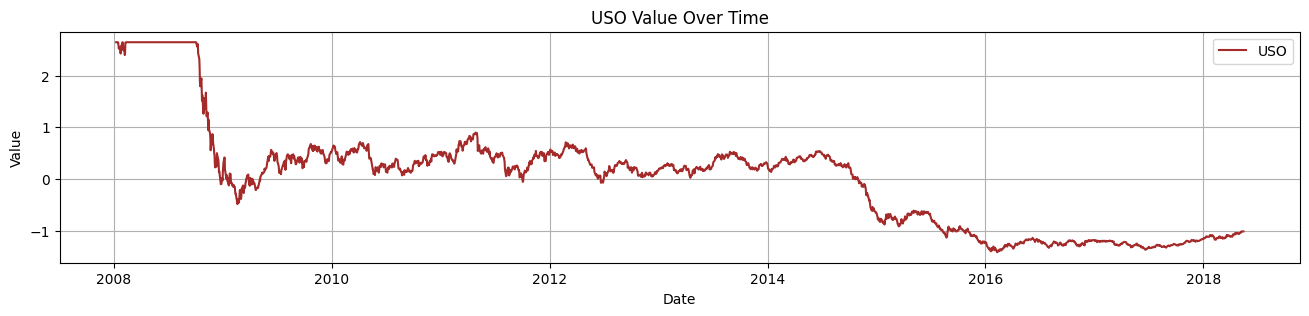

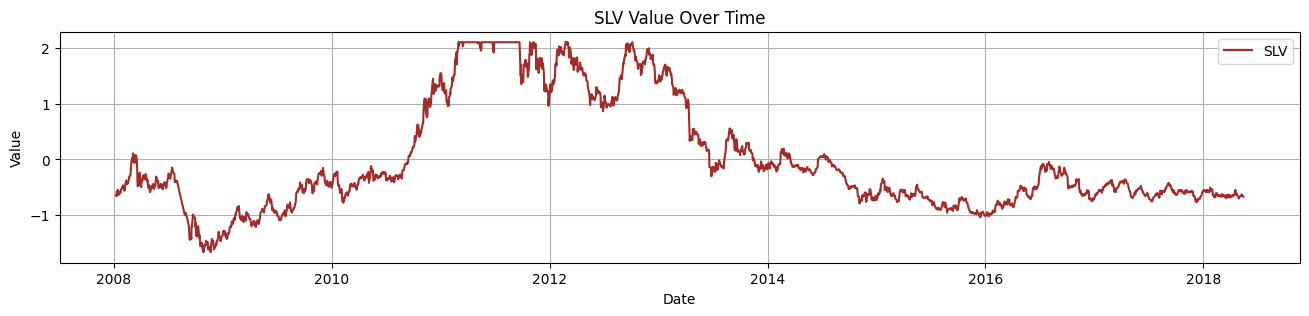

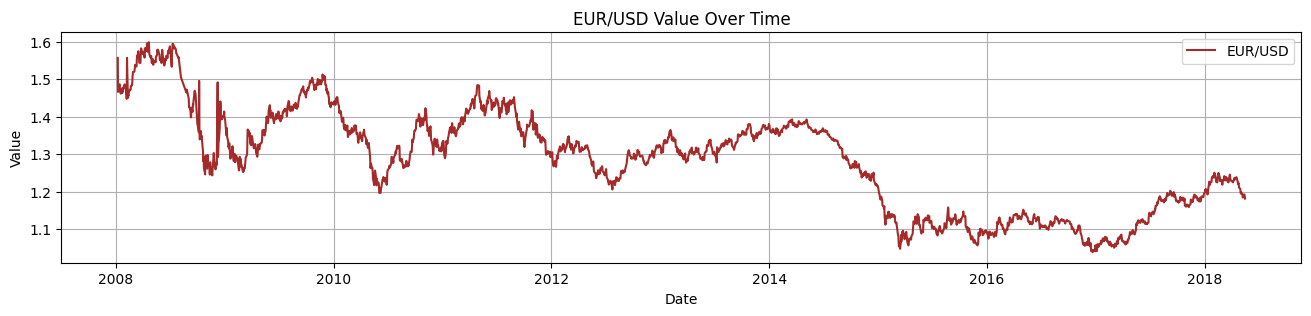

In [317]:
# Line Plots over Time

plt.figure(figsize=(16,3))
plt.plot(gold_data['Date'],gold_data['GLD'],label='GOLD',color='gold')
plt.title(f'Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

for col in num_cols:
    plt.figure(figsize=(16,3))
    plt.plot(gold_data['Date'],gold_data[col],label={col},color='Brown')
    plt.title(f'{col} Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

Overlay Plot (GLD vs USO)

In [318]:
# Scaling Gold for visualization purpose
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(gold_data[['GLD', 'USO']])

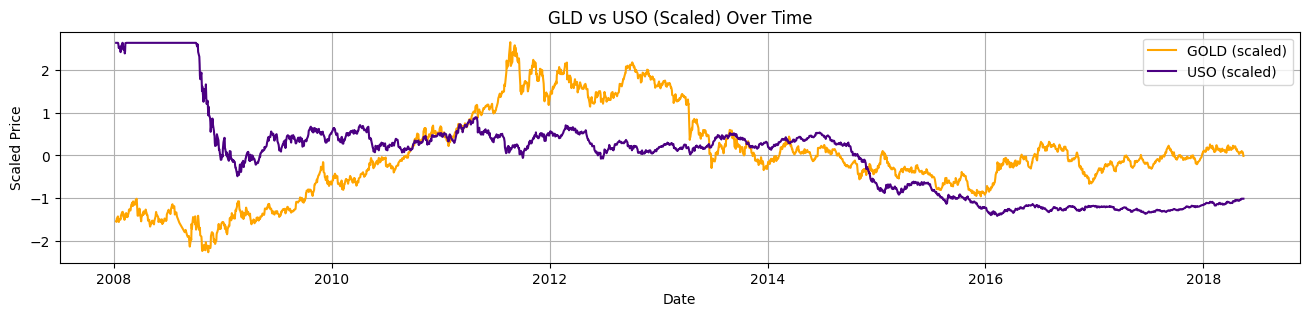

In [319]:
plt.figure(figsize=(16,3))
plt.plot(gold_data['Date'],scaled[:, 0],label='GOLD (scaled)',color='orange')
plt.plot(gold_data['Date'],scaled[:, 1],label='USO (scaled)',color='indigo')
plt.title('GLD vs USO (Scaled) Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.grid(True)
plt.legend()
plt.show()

MODELING

Splitting Features and Target

In [320]:
from sklearn.model_selection import train_test_split

x = gold_data.drop(['Date','GLD','GLD_lag4'],axis=1)
y = gold_data['GLD']

In [321]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2,shuffle=False)
# setting suffle to false is better for time based data

Model Training

Hyperparameter Tuning

In [322]:
# LightGBM
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# GridSearch
lgb_grid = {
    'learning_rate': [0.01,0.05, 0.1],
    'n_estimators': [70,100,150,200]
}
grid_lgb = GridSearchCV(LGBMRegressor(), lgb_grid, cv=5, scoring='r2')
grid_lgb.fit(x_train, y_train)

print("LightGBM Best Grid Params:", grid_lgb.best_params_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 5
[LightGBM] [Info] Start training from score 131.903967
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 5
[LightGBM] [Info] Start training from score 123.539986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 5
[LightGBM] [Info] Start train

LightGBM Regressor

In [323]:
from lightgbm import LGBMRegressor

# Training
model = LGBMRegressor(n_estimators=150, learning_rate=0.05, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1828, number of used features: 5
[LightGBM] [Info] Start training from score 123.186056


 Model Evaluation

In [324]:
# Evaluation
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 

r2_lgbm = r2_score(y_test, y_pred)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred))
mse_lgbm = mean_squared_error(y_test, y_pred)
mae_lgbm = mean_absolute_error(y_test, y_pred)

print(f'LightGBM - R2 : {r2_lgbm:.2f}')
print(f'LightGBM - RMSE : {rmse_lgbm:.2f}')
print(f'LightGBM - MSE : {mse_lgbm:.2f}')
print(f'LightGBM - MAE : {mae_lgbm:.2f}')

LightGBM - R2 : 0.90
LightGBM - RMSE : 1.54
LightGBM - MSE : 2.39
LightGBM - MAE : 1.23


VISUALIZING MODEL PERFORMACE & ERROR ANALYSIS

In [325]:
# Make predictions & Residuals

y_pred = model.predict(x_test)
residuals = y_test - y_pred

Line plot: Actual vs. Predicted

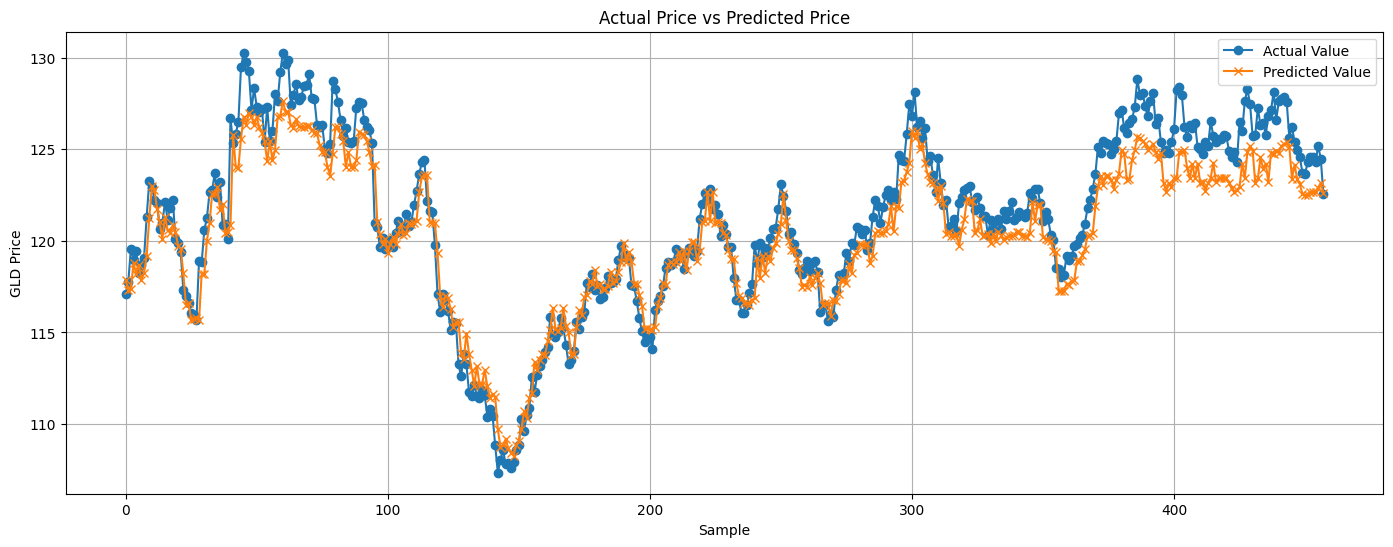

In [326]:
plt.figure(figsize=(17,6))
plt.plot(y_test.values,label='Actual Value',marker='o')
plt.plot(y_pred,label='Predicted Value',marker='x')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Sample')
plt.ylabel('GLD Price')
plt.grid(True)
plt.legend()
plt.show()

Residual plot

Random scatter → good model

Patterns (curve, funnel) → underfitting or heteroscedasticity

C:\Users\shaha\AppData\Local\Temp\ipykernel_7652\633695541.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


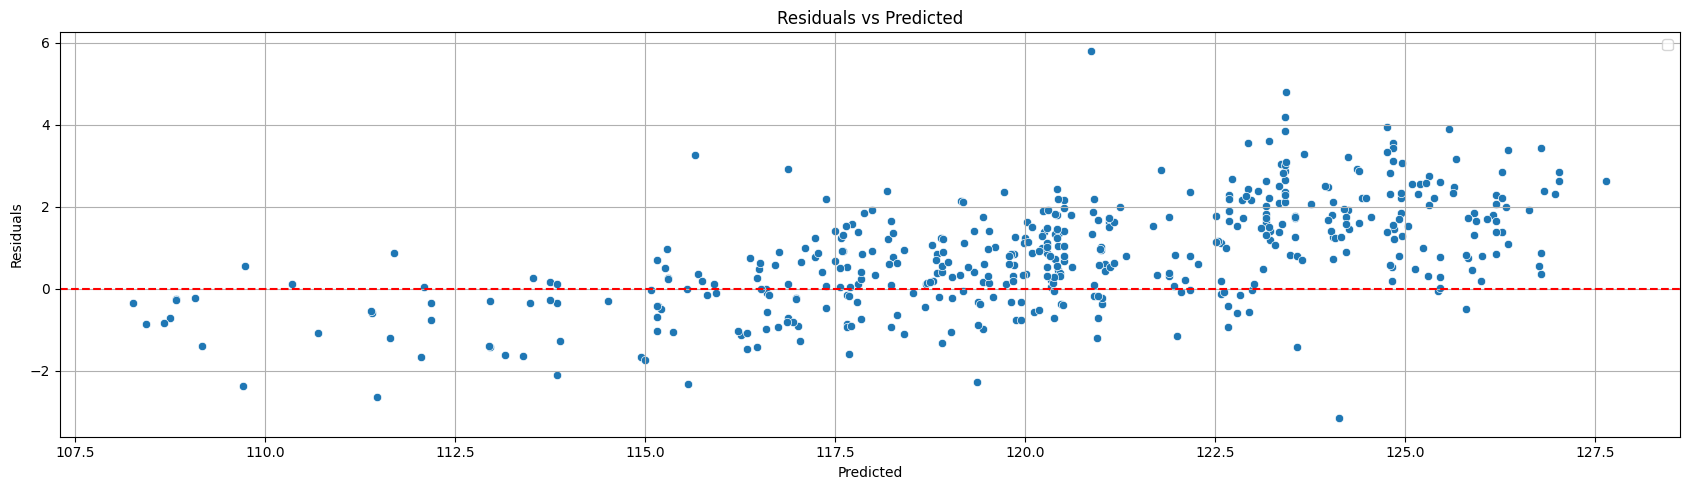

In [327]:
plt.figure(figsize=(17,5))
sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(0,color='red',linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Error Analysis : When is the model wrong?

Histogram of residuals

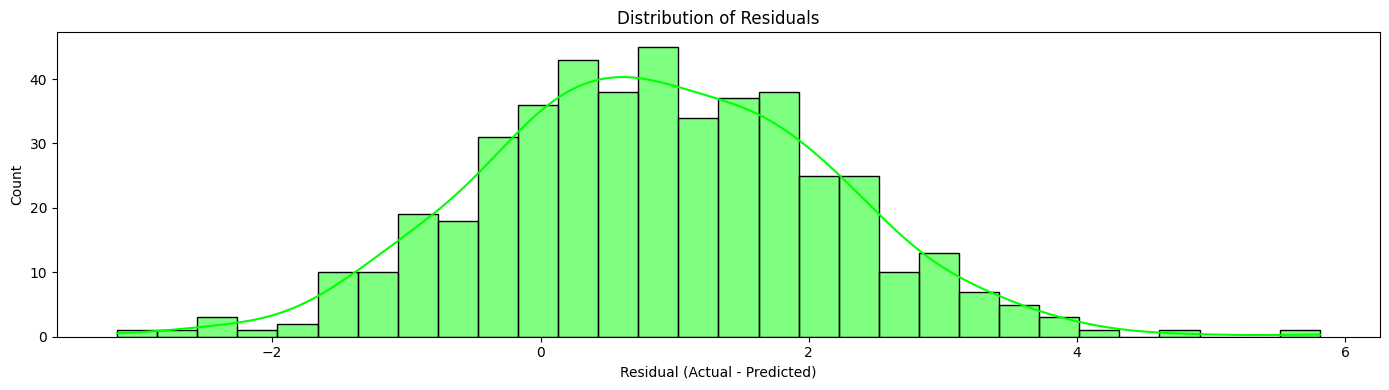

In [328]:
plt.figure(figsize=(14,4))
sns.histplot(residuals,bins=30,kde=True,color='lime')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()

MODEL SERIALIZATION

In [329]:
import joblib

joblib.dump(model,'final_model.joblib')

print('Model saved sucessfully!')

Model saved sucessfully!


In [330]:
gold_data['SLV'].max()

2.1105505249362877

In [331]:
gold_data['SLV'].min()

-1.6711448897946877